# Importing

In [1]:
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv', encoding = 'ISO-8859-1')

In [3]:
df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [4]:
df.shape

(4815, 9)

In [5]:
df.columns

Index(['textID', 'text', 'sentiment', 'Time of Tweet', 'Age of User',
       'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'],
      dtype='object')

In [6]:
df.columns = ['id', 'text', 'sentiment', 'time', 'age', 'country', 'population', 'area', 'density']

In [7]:
df.head()

,id,text,sentiment,time,age,country,population,area,density
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [8]:
df.drop(['id', 'population', 'country', 'population', 'area', 'density'], axis = 1, inplace = True)

In [9]:
df.head()

,text,sentiment,time,age
0,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20
1,Shanghai is also really exciting (precisely -...,positive,noon,21-30
2,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45
3,happy bday!,positive,morning,46-60
4,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70


# Processing

In [10]:
df.head()

,text,sentiment,time,age
0,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20
1,Shanghai is also really exciting (precisely -...,positive,noon,21-30
2,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45
3,happy bday!,positive,morning,46-60
4,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70


In [11]:
df.isnull().sum()

text         1281
sentiment    1281
time         1281
age          1281
dtype: int64

In [12]:
df.dropna(subset = ['text'], inplace = True)

In [13]:
df.isnull().sum()

text         0
sentiment    0
time         0
age          0
dtype: int64

In [14]:
df.shape

(3534, 4)

In [15]:
df.head()

,text,sentiment,time,age
0,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20
1,Shanghai is also really exciting (precisely -...,positive,noon,21-30
2,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45
3,happy bday!,positive,morning,46-60
4,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70


In [50]:
# balancing the data

In [18]:
df['sentiment'].value_counts()

neutral     1430
positive    1103
negative    1001
Name: sentiment, dtype: int64

([<matplotlib.patches.Wedge at 0x1d70e023790>,
 [Text(0.32463109573440374, 1.0510064945956712, ''),
  Text(-1.0209732484755474, -0.4094064311870152, ''),
  Text(0.6924805186340899, -0.8546758048010147, '')])

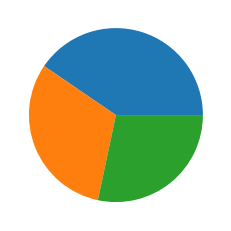

In [19]:
plt.pie(df.sentiment.value_counts())

In [20]:
df_major = df[df['sentiment'] == 'neutral']
df_major.shape

(1430, 4)

In [21]:
df_minor = df[df['sentiment'] != 'neutral']
df_minor.shape

(2104, 4)

In [22]:
df_major = resample(df_major, replace = False, n_samples = df[df['sentiment'] == 'positive'].shape[0], random_state = 1234)

In [23]:
df_major.shape

(1103, 4)

In [24]:
df = df_major.append(df_minor)

In [25]:
df.index = [i for i in range(df.shape[0])]

In [26]:
df['sentiment'].value_counts()

neutral     1103
positive    1103
negative    1001
Name: sentiment, dtype: int64

([<matplotlib.patches.Wedge at 0x1d710229330>,
 [Text(0.5179720957562439, 0.9704148123446409, ''),
  Text(-1.0945134076816554, -0.10972875833203655, ''),
  Text(0.6121906562847271, -0.9139051375048043, '')])

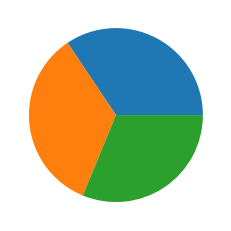

In [27]:
plt.pie(df.sentiment.value_counts())

In [28]:
df.head()

,text,sentiment,time,age
0,NKU - I can get that app after all!,neutral,morning,0-20
1,cant find my shoes. :/ hope its as bad as itll...,neutral,night,70-100
2,Oh is that time for real?,neutral,noon,60-70
3,Hi Jordan i`m gonna all of u...I know ur busy...,neutral,night,31-45
4,It`s weird waking up in my own bed. Slightly c...,neutral,noon,21-30


In [29]:
df.shape

(3207, 4)

In [30]:
text = df.text

In [31]:
text.replace('[^a-zA-Z]', ' ', regex = True, inplace = True)
text.replace('&lt;/?.*?&gt;', ' &lt;&gt; ', regex = True, inplace = True)
text.replace('(\\d|\\W)+', ' ', regex = True, inplace = True)

In [32]:
text.head()

0                    NKU I can get that app after all 
1    cant find my shoes hope its as bad as itll get...
2                            Oh is that time for real 
3     Hi Jordan i m gonna all of u I know ur busy a...
4    It s weird waking up in my own bed Slightly co...
Name: text, dtype: object

In [33]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

rows = list()
for row in range(len(text.index)):
    words = nltk.word_tokenize(text[row])
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    rows.append(' '.join(words))

In [34]:
rows[0:5]

['nku i get app',
 'cant find shoe hope bad itll get nite im happi',
 'oh time real',
 'hi jordan gon na u i know ur busi know ur probabl tire pleas reschedul nc leav us',
 'it weird wake bed slightli comfort miss group but love use pillow']

In [35]:
vectorizer = CountVectorizer()
vectorizer.fit(rows)

CountVectorizer()

In [36]:
rows = vectorizer.transform(rows)

In [37]:
rows.shape

(3207, 5459)

In [38]:
rows.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [39]:
vectorizer.get_feature_names_out()

array(['aa', 'aaaaa', 'aaaaaaaa', ..., 'zr', 'zs', 'zt'], dtype=object)

In [40]:
df_text = pd.DataFrame(rows.toarray(), columns = [str(i) for i in range(rows.shape[1])])

In [41]:
df_text.head()

,0,1,2,3,4,5,6,7,8,9,...,5449,5450,5451,5452,5453,5454,5455,5456,5457,5458
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df_text.shape

(3207, 5459)

In [43]:
df.head()

,text,sentiment,time,age
0,NKU I can get that app after all,neutral,morning,0-20
1,cant find my shoes hope its as bad as itll get...,neutral,night,70-100
2,Oh is that time for real,neutral,noon,60-70
3,Hi Jordan i m gonna all of u I know ur busy a...,neutral,night,31-45
4,It s weird waking up in my own bed Slightly co...,neutral,noon,21-30


In [44]:
df_final = pd.concat([df_text, pd.get_dummies(df.iloc[:, 2:]), df.iloc[:, 1]], axis = 1, join = 'inner')

In [45]:
df_final.shape

(3207, 5469)

In [46]:
df_final.head()

,0,1,2,3,4,5,6,7,8,9,...,time_morning,time_night,time_noon,age_0-20,age_21-30,age_31-45,age_46-60,age_60-70,age_70-100,sentiment
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,neutral
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,neutral
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,neutral
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,neutral
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,neutral


# Testing

In [47]:
def check(df, test_size, random_state, model):
    x_train, x_test, y_train, y_test = train_test_split(
        df.drop('sentiment', axis = 1),
        df['sentiment'],
        test_size = test_size,
        random_state = random_state
    )
    model.fit(x_train, y_train)
    print(f'''Results for {model.__str__()} at {test_size}/{random_state}:
    Test: {accuracy_score(y_test, model.predict(x_test))}
    Train: {accuracy_score(y_train, model.predict(x_train))}\n''')

In [48]:
check(df_final, 0.3, 42, MultinomialNB())
check(df_final, 0.3, 50, MultinomialNB())
check(df_final, 0.25, 50, MultinomialNB())
check(df_final, 0.28, 42, MultinomialNB())

check(df_final, 0.3, 42, LogisticRegression(max_iter = 500))
check(df_final, 0.3, 50, LogisticRegression(max_iter = 500))
check(df_final, 0.25, 50, LogisticRegression(max_iter = 500))
check(df_final, 0.28, 42, LogisticRegression(max_iter = 500))

Results for MultinomialNB() at 0.3/42:
    Test: 0.6064382139148494
    Train: 0.9068627450980392

Results for MultinomialNB() at 0.3/50:
    Test: 0.5669781931464174
    Train: 0.9166666666666666

Results for MultinomialNB() at 0.25/50:
    Test: 0.5835411471321695
    Train: 0.920997920997921

Results for MultinomialNB() at 0.28/42:
    Test: 0.6169265033407573
    Train: 0.9060199220441749

Results for LogisticRegression(max_iter=500) at 0.3/42:
    Test: 0.6458982346832814
    Train: 0.9750445632798574

Results for LogisticRegression(max_iter=500) at 0.3/50:
    Test: 0.6147455867082036
    Train: 0.9781639928698752

Results for LogisticRegression(max_iter=500) at 0.25/50:
    Test: 0.5947630922693267
    Train: 0.9746361746361747

Results for LogisticRegression(max_iter=500) at 0.28/42:
    Test: 0.6425389755011136
    Train: 0.9744478129060199



# Conclusion 🤷‍♂

In [49]:
# LogReg gave relatively better results